##Question: Imagine a scenario where an investor wants to understand the risks and returns associated with various stocks before investing in them.  Given two stocks, find out which stock is at lesser risk by looking into measures of dispersion of stocks values. Also implement the 12 sub task given in today’s class for the same problem


In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import seaborn as sns
import warnings

## load beml data
beml_df=pd.read_csv('BEML.csv')
beml_df[0:5]


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [3]:
## load the glaxo data 
print("glaxo")
glaxo_df=pd.read_csv('GLAXO.csv')
glaxo_df[0:5]

glaxo


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [5]:
## selecting date and time in dataframe

beml_df=beml_df[['Date', 'Close']]
glaxo_df=glaxo_df[['Date' ,'Close']]

In [6]:
## change time to index 
glaxo_df=glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df=beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

In [7]:
## check information of beml stock
beml_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1739 entries, 2010-01-04 to 2016-12-30
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1739 non-null   object 
 1   Close   1739 non-null   float64
dtypes: float64(1), object(1)
memory usage: 40.8+ KB


Text(0.5, 1.0, 'plotting  graph of glaxo stack')

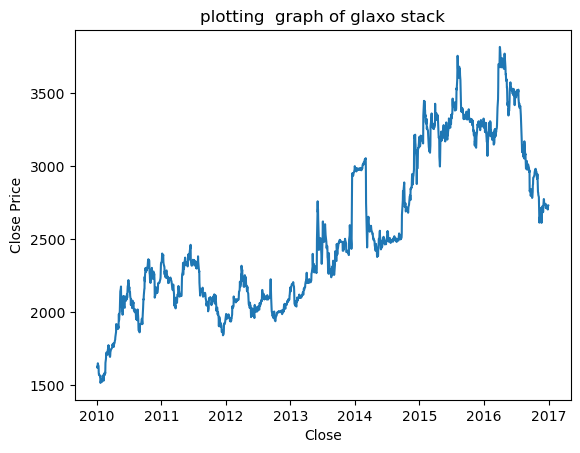

In [8]:
## plotting the close data of glaxo stock
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

plt.plot(glaxo_df.Close);
plt.xlabel('Close');
plt.ylabel('Close Price');
plt.title("plotting  graph of glaxo stack")


Text(0.5, 1.0, 'plotting  graph of glaxo stack')

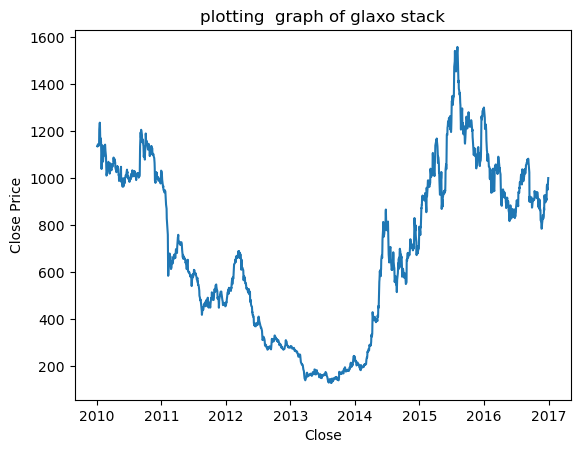

In [9]:
## plotting the close data of beml stock
plt.plot(beml_df.Close);
plt.xlabel('Close');
plt.ylabel('Close Price');
plt.title("plotting  graph of glaxo stack")


In [10]:
## claculating gain 
glaxo_df['gain']=glaxo_df.Close.pct_change(periods =1)

beml_df['gain']=beml_df.Close.pct_change(periods=1)
glaxo_df.head(5)

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


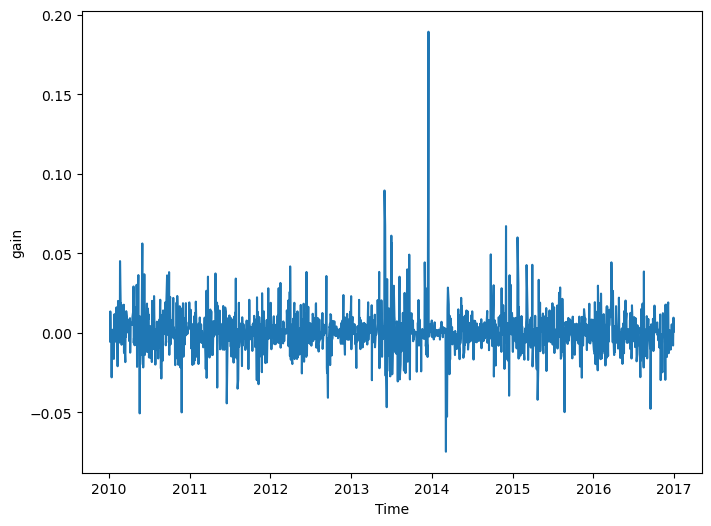

In [11]:
##ploting gain aganinst time
plt.figure(figsize =(8, 6));
plt.plot(glaxo_df.index,glaxo_df.gain);
plt.xlabel('Time');
plt.ylabel('gain');


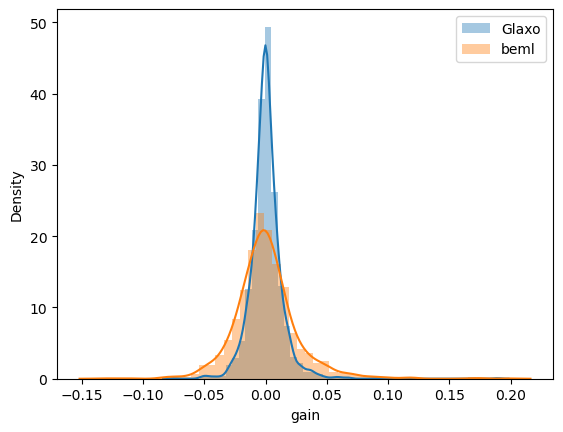

In [26]:
##plotinf gain of both stocks
import warnings
warnings.filterwarnings('ignore')

sns.distplot(glaxo_df.gain ,label='Glaxo')
sns.distplot(beml_df.gain ,label='beml')
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [14]:
## print daily gain
print("daily gain of glaso")
print("Mean: ", round(glaxo_df.gain.mean(),4))
print("standard derivation:" ,round(glaxo_df.gain.std(),4))
      

daily gain of glaso
Mean:  0.0004
standard derivation: 0.0134


In [15]:
## print daily gain
print("daily gain of beml")
print("Mean: ", round(beml_df.gain.mean(),4))
print("standard derivation:" ,round(beml_df.gain.std(),4))
      

daily gain of beml
Mean:  0.0003
standard derivation: 0.0264


In [16]:
## describe and  risk of stack
print("beml stock")
beml_df.gain.describe()


beml stock


count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

In [17]:
## describe and  risk of stack
print("glaxo stock")
glaxo_df.gain.describe()

glaxo stock


count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: gain, dtype: float64

In [18]:
## beml stock has higher risk as standard derivation of beml is 2.64% 
##whereas the standard derivation of glaxo ix 1.33%